In [17]:
import tensorflow as ts 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("Sets/datos_de_ventas.csv")
df_train

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


<Axes: xlabel='Temperature', ylabel='Revenue'>

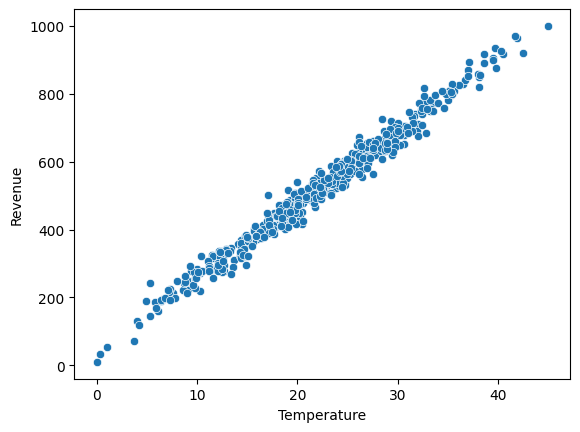

In [4]:
sns.scatterplot(x = df_train['Temperature'], y= df_train['Revenue'])


In [5]:
x_train = df_train['Temperature']
y_train = df_train['Revenue']

In [9]:
model = ts.keras.Sequential()
model.add(ts.keras.layers.Dense(units=1, input_shape = [1]))
model.summary()

C:\Users\Lenovo 1\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer= ts.keras.optimizers.Adam(0.1), loss='mean_squared_error')


In [14]:
epochs_hist= model.fit(x_train, y_train, epochs=1000)

epochs_hist.history.keys()


Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 619.1072 
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 654.9423 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 606.4482
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step - loss: 663.1633
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - loss: 607.7998
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 579.0699
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 608.6580 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 612.7114 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 640.1392 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 662.8857 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 632.0104 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 648.2347 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 667.0129 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 607.8561
Epoch 15/10

dict_keys(['loss'])

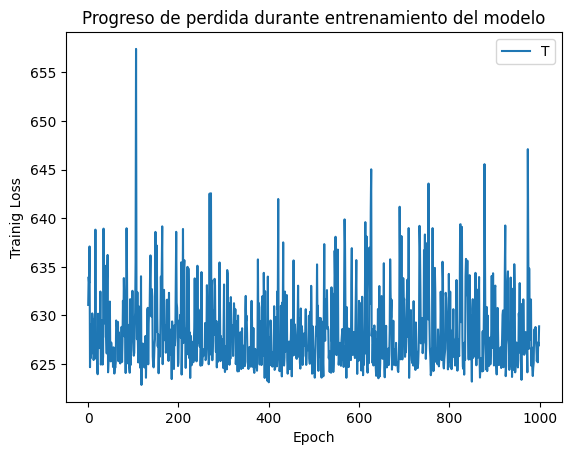

In [15]:
plt.plot(epochs_hist.history['loss'])
plt.title("Progreso de perdida durante entrenamiento del modelo")
plt.xlabel("Epoch")
plt.ylabel("Trainig Loss")
plt.legend('Training Loss')

In [16]:
weights= model.get_weights()

[array([[21.458523]], dtype=float32), array([44.782932], dtype=float32)]


In [19]:
#Predicion
df_test = pd.read_csv("Sets/test.csv")

temperature= df_test['Temperature'].values
revenue= model.predict([temperature]).flatten()

df_output= pd.DataFrame({
    'id': df_test['id'],
    'Revenue': revenue
})

df_output.to_csv("Sets/output.csv", index=False)
print("Archivo correctamente guardado.")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Archivo correctamente guardado.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0.5, 1.0, 'Ganancia generada vs temperatura en una empresa de helados.')

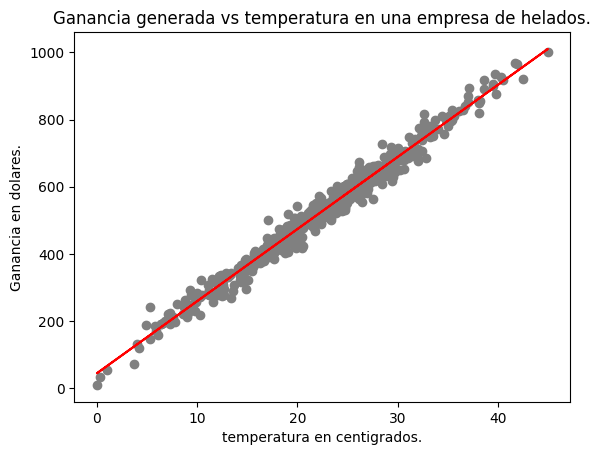

In [20]:
#Vemos la relacion de las variables y los resultados que nos entrego con respecto a la temperatura.
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, model.predict(x_train), color= 'red')
plt.ylabel("Ganancia en dolares.")
plt.xlabel("temperatura en centigrados.")
plt.title("Ganancia generada vs temperatura en una empresa de helados.")
